### Student Information
Name: 黃子軍

Student ID: 110062143

GitHub ID: ZiJun0502

Kaggle name: ZiJun0502

Kaggle private scoreboard snapshot:

[Snapshot](../img/pic0.png)

## NOTE !!! 
Note that the image provided is my late submission score, and it shows the expected rank of my score. I apologize for not participating in the competition on time; I did not notice that the competition deadline was earlier than that of Lab2. ;(

Still, I tried my best to achieve a high score in the competition. The code for the competition is in the same directory as this file with the filename: *Comp_Lab2.ipynb*, and I have written detailed comments and markdown in it. I hope that will make up for some marks. QQ, sorry for any confusion and inconvenience I may have caused.

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [23]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [24]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
                         # combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [25]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
train_df.shape

(3613, 4)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text)
test_counts = count_vect_test.fit_transform(test_df.text)

In [27]:
test_counts

<347x1949 sparse matrix of type '<class 'numpy.int64'>'
	with 5084 stored elements in Compressed Sparse Row format>

In [28]:
term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

In [29]:
def plot_freq(tf, vectorizer, title='', k=30):
    data = {'Terms': vectorizer.get_feature_names_out()[:k], 'Term Frequencies': tf[:k]}
    df = pd.DataFrame(data)

    # Sort the data in descending order of term frequencies
    df = df.sort_values(by='Term Frequencies', ascending=False)

    fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
    fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility
    fig.update_layout(title_text=title)

    fig.show()
plot_freq(term_frequencies_train, count_vect_train, "training dataset")
plot_freq(term_frequencies_test, count_vect_test, "testing dataset")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, token_pattern=None) 

TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

print(train_data_TFIDF_features_1000.shape)

feature_names_100_to_110 = TFIDF_1000.get_feature_names_out()[100:110]
print("Feature names for features [100:110]:", feature_names_100_to_110)

(3613, 1000)
Feature names for features [100:110]: ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

**Ans:** The diagonal of the confusion matrix represents the count of correctly predicted labels. The entry cm['anger']['fear'] corresponds to the instances mislabeled as anger when the true label is fear. A smaller value in off-diagonal terms generally indicates better model performance. Notably, the entries cm['anger']['fear'] and cm['fear']['anger'] are relatively large. Identifying such instances helps uncover issues or biases in the model, guiding improvements for enhanced performance.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [31]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [32]:
from sklearn.naive_bayes import MultinomialNB

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

y_test_pred[:10]

array(['fear', 'joy', 'sadness', 'sadness', 'anger', 'anger', 'sadness',
       'anger', 'anger', 'fear'], dtype='<U7')

In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



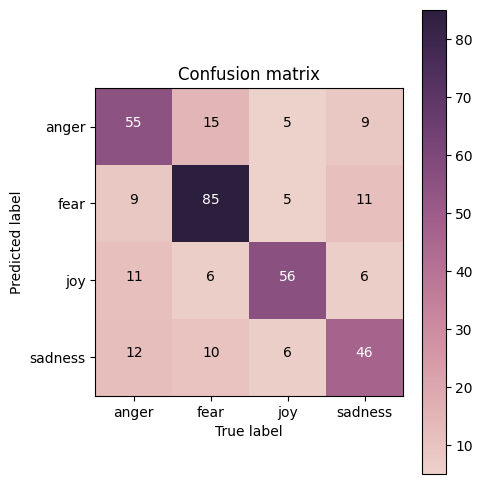

In [34]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [35]:
label_counts = y_train.value_counts()

# Display the counts
print(label_counts)

emotion
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64


**Ans:**

1. **Overall Performance:** The Naive Bayes model outperforms the Decision Tree model in all three macro avg. score (precision, recall, f1-score)

2. **Class-wise Performance:** Although the Naive Bayes model tends to have higher macro avg. of precision and recall, they actually tied(both have two classes with higher scores) in terms of class-wise performance. 
3. **Interpretation:** The score for the "Fear" class in the Naive Bayes model is significantly higher than that in the Decision Tree model, suggesting that the Naive Bayes model is more effective in managing imbalanced classes. Conversely, the Decision Tree model is susceptible to overfitting, resulting in a substantial decrease in scores, particularly due to mislabeled instances in the "anger" and "fear" classes. The Naive Bayes algorithm assumes that features are conditionally independent given the class, which is a reasonable assumption for text data represented as Bag-of-Words (BOW). In contrast, the Decision Tree model captures more intricate relationships in the data. I believe that the sparsity of the BOW embeddings contributes to the challenge faced by the Decision Tree model, as it may struggle to separate classes effectively using a limited portion of the data. In contrast, the Naive Bayes model relies on the presented words, calculating conditional probabilities without being significantly impacted by the sparsity of the BOW embeddings.


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [36]:
## deal with label (string -> one-hot)
import keras
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# I/O check
input_shape = X_train.shape[1]

output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3207 - accuracy: 0.3808 - val_loss: 1.2495 - val_accuracy: 0.4669
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9671 - accuracy: 0.6626 - val_loss: 0.8945 - val_accuracy: 0.6772
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7863 - val_loss: 0.7987 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8566 - val_loss: 0.7928 - val_accuracy: 0.6859
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8832 - val_loss: 0.8225 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.9095 - val_loss: 0.8871 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9330 - val_loss: 0.9263 - val_accuracy: 0.6974
Epoch 

In [37]:
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")

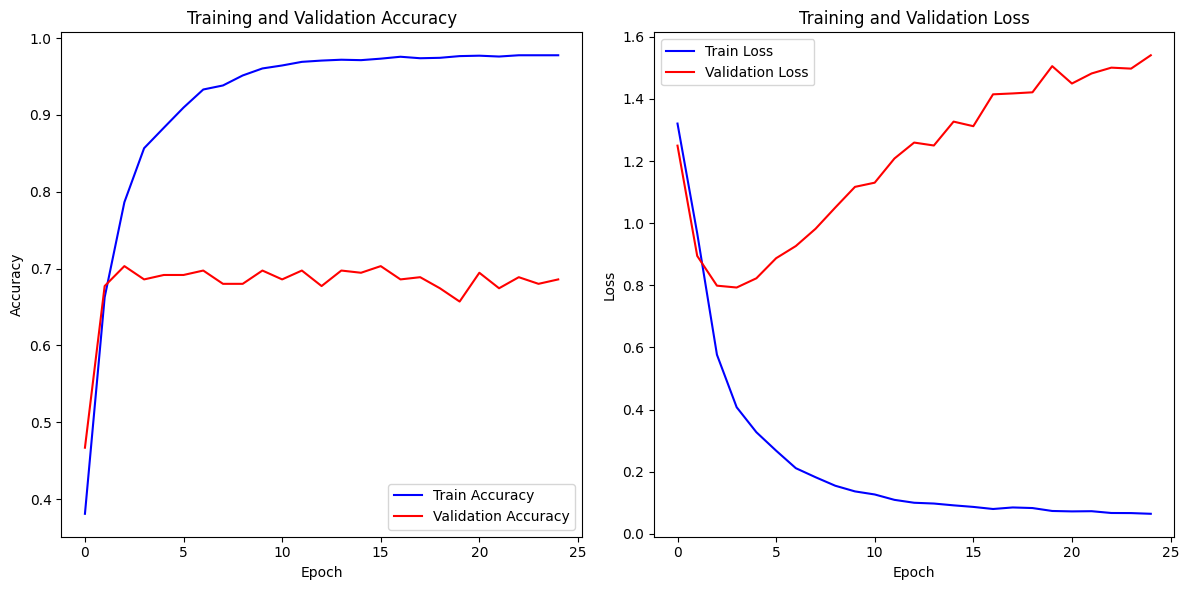

In [38]:
epochs = training_log['epoch']

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_log['accuracy'], label='Train Accuracy', color='blue')
plt.plot(epochs, training_log['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_log['loss'], label='Train Loss', color='blue')
plt.plot(epochs, training_log['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Ans:** We observe an increase in validation loss after the 3rd epoch, while the accuracy fluctuates around 0.7. This clearly indicates an overfitting scenario, suggesting that the model should have been stopped early at the 3rd or 4th epoch to prevent overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [39]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Benefit', 'out', 'exhilaration', 'called', 'online', 'backing', 'off', ':', 'JkUVmvQXY']),
       list(['@', 'TJ_FASHO', 'lmao', 'clown', 'my', 'own', 'hair', 'I', "'m", 'going', 'to', 'dread', 'lmao']),
       list(['Everything', 'is', 'far', 'away', 'because', 'time', 'is', 'short', ',', 'no', 'rest', 'for', 'the', 'weary', '.'])],
      dtype=object)

In [57]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [58]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.69425917,  0.36006323, -0.1978819 , -0.03342801, -0.50637525,
       -1.2468028 ,  0.69992936,  1.0548644 , -0.30981737, -0.14771579,
       -0.30648357, -0.57779866, -0.7014096 ,  0.37237108,  0.06701756,
       -0.28562593,  0.44383454, -0.83673054, -0.16276129, -1.180428  ,
        0.68753445,  0.805566  ,  0.5111623 ,  0.3111951 ,  0.7108946 ,
        0.0488994 , -0.75168383,  0.1619028 , -0.22269356,  0.3110001 ,
        0.29642615, -0.15289955,  0.6764102 , -0.51937765, -0.07986998,
        0.6536661 ,  0.5980622 , -0.36345807, -0.68658334, -0.40022445,
       -0.24791923,  0.06269117, -0.26974937,  0.5522038 ,  0.69766855,
       -0.19057333, -1.1642706 ,  0.20583695,  0.605036  ,  0.5189815 ,
       -0.25530472, -0.56550646, -0.14538248, -0.3787444 , -0.26258296,
       -0.28168178,  0.24277817, -0.20258488,  0.3042924 ,  0.6989497 ,
       -0.01988804, -0.0327384 ,  0.7708426 ,  0.3722926 , -0.58258724,
        0.80076355,  0.32045868,  0.7361065 , -1.483294  ,  0.45

In [65]:
sentence = ["Hello, I", "am", "John"]
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0

    for word in words:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1

    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

sentence_vector = average_word_vectors(sentence, word2vec_model, vector_dim)


By averaging the word vectors in a sentence, we obtain a summary that encapsulates the collective meaning of those words as if they were forming a sentence. And the resulting vector is represented by the values of 100 features in the Word2Vec model.

In [68]:
sentence_vector

array([ 0.06323283,  0.00296255,  0.12322141,  0.3403742 , -0.3332378 ,
       -1.1073799 ,  0.6029469 ,  0.7770324 , -0.25584447, -0.3361085 ,
        0.14845778, -0.81417596,  0.21926138,  0.4478197 ,  0.23889314,
       -0.2135048 ,  0.23670065, -0.21408638, -0.08593568, -1.0076833 ,
        0.3370609 ,  0.19565788,  0.43977076, -0.1643227 ,  0.1287029 ,
       -0.24432945, -0.37897927,  0.0639899 , -0.18359491, -0.02352146,
        0.5491573 ,  0.15420277,  0.65352273, -0.44193536, -0.32150826,
        0.69089437,  0.4703984 , -0.39885297, -0.3958305 , -0.727713  ,
        0.03369606, -0.57529384, -0.12955263,  0.21938556,  0.7135163 ,
       -0.28568202, -0.38404214,  0.02327571,  0.38028678,  0.20853423,
        0.20629586, -0.00437198, -0.02140263, -0.51449835, -0.54925936,
        0.29975694, -0.03979969,  0.08868131,  0.16919519,  0.08496012,
        0.534975  , -0.01726731,  0.24298847,  0.1008854 , -0.40742588,
        0.6807003 ,  0.08525468,  0.61453205, -0.72561073,  0.52

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [76]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


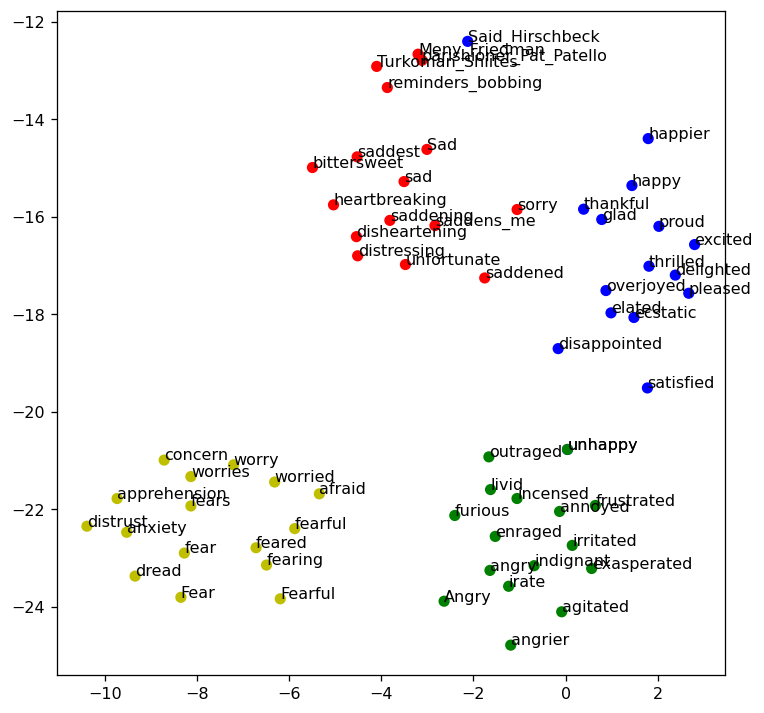

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model (replace this with your actual Word2Vec model)
model = w2v_google_model  # Assuming word2vec_model is your trained Word2Vec model

## target words and colors
word_list = ["angry", "happy", "sad", "fear"]
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in model.most_similar('fear', topn=topn)]        
target_words = happy_words + angry_words + sad_words + fear_words


cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
